Word2Vec_Back2Basic
============

02. NAVER 뉴스의 tokenize와 NLTK 사용법 + pilot test
-------------------------

---

## 네이버 뉴스 분석

### 데이터 소개

* 네이버 뉴스를 2016년 1월부터 12월까지 크롤링
* 48개의 class가 존재
* 기사가 적은 class가 존재하여 down sampling을 통해 calss 문제 해결
* Train Set 160,000개
    * 각 class 당 3300개 +- 100 개정도 존재
* Test Set 22,342개


|정치      |경제        |사회      |생활/문화     |세계          |IT/과학       |
|:---------|:-----------|:---------|:-------------|:-------------|:-------------|
|청와대    |금융        |사건사고  |건강정보      |아시아/호주   |모바일        |
|국회/정당 |증권        |교육      |자동차/시승기 |미국/중남미   |인터넷/SNS    |
|북한      |산업/재계   |노동      |도로/교통     |유럽          |통신/뉴미디어 |
|행정      |중기/벤처   |언론      |여행/레저     |중동/아프리카 |IT 일반       |
|국방/외교 |부동산      |환경      |음식/맛집     |세계 일반     |보안/해킹     |
|정치일반  |글로벌 경제 |인권/복지 |패션/뷰티     |NA            |컴퓨터        |
|NA        |생활경제    |식품/의료 |공연/전시     |NA            |게임/리뷰     |
|NA        |경제 일반   |지역      |책            |NA            |과학 일반     |
|NA        |NA          |인물      |종교          |NA            |NA            |
|NA        |NA          |사회일반  |날씨          |NA            |NA            |
|NA        |NA          |NA        |생활문화 일반 |NA            |NA            |

---

## 1. 데이터 소개

### 데이터 불러오기

In [4]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data

In [5]:
data_1 = read_data('../word2vec/data/naver_1_Month.txt?dl=1')
data_2 = read_data('../word2vec/data/naver_2_Month.txt?dl=1')
data_3 = read_data('../word2vec/data/naver_3_Month.txt?dl=1')
data_4 = read_data('../word2vec/data/naver_4_Month.txt?dl=1')
data_5 = read_data('../word2vec/data/naver_5_Month.txt?dl=1')
data_6 = read_data('../word2vec/data/naver_6_Month.txt?dl=1')
data_7 = read_data('../word2vec/data/naver_7_Month.txt?dl=1')
data_8 = read_data('../word2vec/data/naver_8_Month.txt?dl=1')
data_9 = read_data('../word2vec/data/naver_9_Month.txt?dl=1')
data_10 = read_data('../word2vec/data/naver_10_Month.txt?dl=1')
data_11 = read_data('../word2vec/data/naver_11_Month.txt?dl=1')
data_12 = read_data('../word2vec/data/naver_12_Month.txt?dl=1')

In [6]:
data_merge = data_1+data_2+data_3+data_4+data_5+data_6+data_7+data_8+data_9+data_10+data_11+data_12

del data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10, data_11, data_12

In [7]:
# row, column의 수가 제대로 읽혔는지 확인
print(len(data_merge))      # nrows: 150000
print(len(data_merge[0]))   # ncols: 3

192706
3


## 데이터 전처리

In [8]:
# 각 리스트에는 기사, 대분류, 소분류 3가지 항목이 있는데
# 가끔 크롤링 과정에서 오류가 발생한다.
X = [row for row in data_merge if len(row) == 3]

In [9]:
print(len(X))      # nrows: 150000
print(len(X[0]))   # ncols: 3

192342
3


In [10]:
train_data=X[:160000]
test_data=X[160000:]

In [11]:
del data_merge, X

---

## 2. KoNLPy 로 품사 태깅

In [ ]:
from konlpy.tag import Twitter

pos_tagger = Twitter()
def tokenize(doc):
    # norm, stem은 optional
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

print(twitter.morphs(u'단독입찰보다 복수입찰의 경우'))  
* ['단독', '입찰', '보다', '복수', '입찰', '의', '경우', '가']

print(twitter.nouns(u'유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))  
* ['유일하', '항공기', '체계', '종합', '개발', '경험']

print(twitter.phrases(u'날카로운 분석과 신뢰감 있는 진행으로'))  
* ['분석', '분석과 신뢰감', '신뢰감', '분석과 신뢰감 있는 진행', '신뢰감 있는 진행', '진행', '신뢰']  

print(twitter.pos(u'이것도 되나욬ㅋㅋ'))  
* [('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]

print(twitter.pos(u'이것도 되나욬ㅋㅋ', norm=True))
* [('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되', 'Verb'), ('나요', 'Eomi'), ('ㅋㅋ', 'KoreanParticle')]  

print(twitter.pos(u'이것도 되나욬ㅋㅋ', norm=True, stem=True))
* [('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]  

[[1] _twitter.py](https://github.com/konlpy/konlpy/blob/master/konlpy/tag/_twitter.py)

In [12]:
import pickle

In [ ]:
# 전체과정에서 시간이 가장 오래 걸린다.

# train_docs = [(tokenize(row[0]), row[2]) for row in train_data]
# test_docs = [(tokenize(row[0]), row[2]) for row in test_data]

### tokenize save

In [ ]:
# save txt
# with open("../word2vec/data/train_docs_save.txt", 'wb')as wt:
#     pickle.dump(train_docs, wt)
    
# with open("../word2vec/data/test_docs_save.txt", 'wb')as wt:
#     pickle.dump(test_docs, wt)

### tokenize load

In [13]:
# load
with open('../word2vec/train_docs_save.txt?dl=1', 'rb') as rd:
    train_docs = pickle.load(rd)
    
with open('../word2vec/test_docs_save.txt?dl=1', 'rb') as rd:
    test_docs = pickle.load(rd)

In [14]:
# 잘 들어갔는지 확인
from pprint import pprint
pprint(train_docs[0][0][:10])

['-/Punctuation',
 '내각/Noun',
 '·/Foreign',
 '청와대/Noun',
 '참모/Noun',
 '들/Suffix',
 '과/Josa',
 '신년/Noun',
 '떡국/Noun',
 '조찬/Noun']


### 그런데

#### 형태소로 꼭 나눠야 하나?
    * 데이터가 정말 충분하다면, 어절 단위로도 가능하겠지만...
    * 김태훈's `시인뉴럴`은 음절단위의 분석

#### 품사(POS)태그를 부착해야 하나?
    * 선택
    * 품사를 태깅하면 동음이의어를 구분할 수 있음

---

## 3. NLTK로 데이터 간단하게 탐색

### Training data의 token 모으기

In [17]:
import nltk

tokens = [t for d in train_docs for t in d[0]]

text = nltk.Text(tokens, name='NMSC')

### 전체 token의 갯수

In [18]:
print(len(text.tokens))                 

70744406


### 유니크한 token의 갯수

In [19]:
print(len(set(text.tokens)))

237566


이 수치가 바로 모형의 vocab의 갯수이다.  
마지막 softmax 계산시 약 23만개의 Softmax 계산량이 소요된다.
그래서
* hierarchical softmax
* negative sampling  

방법이 필요한 것이다.

### 가장 많은 token

In [20]:
pprint(text.vocab().most_common(10))

[('하다/Verb', 2417269),
 ('./Punctuation', 2354571),
 ('을/Josa', 1647832),
 ('에/Josa', 1054913),
 ('의/Josa', 1048177),
 ('이/Josa', 1024102),
 (',/Punctuation', 989111),
 ('를/Josa', 880735),
 ('은/Josa', 733400),
 ('있다/Adjective', 687638)]


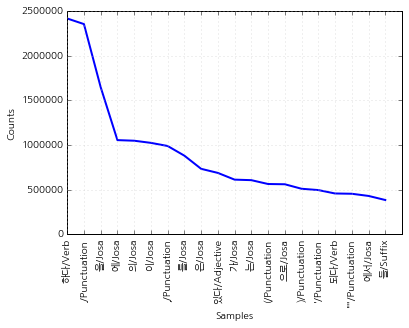

In [21]:
# 컴퓨터 폰트 확인
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/nhn-nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

text.plot(20)

### 특정 단어의 출현 빈도

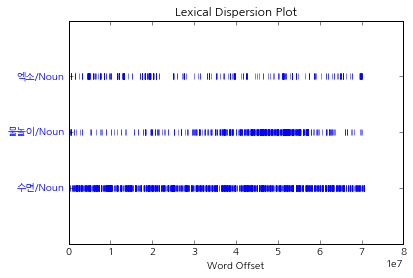

In [22]:
text.dispersion_plot(['엑소/Noun', '물놀이/Noun', '수면/Noun'])

이 외에도 NLTK 패키지에 다양한 기능들이 있다. [[1]](https://www.lucypark.kr/courses/2015-dm/text-mining.html) [[2]](http://www.nltk.org/)

## 4. Pilot test

#### 여기서는 간단하게 term이 문서에 존재하는지의 유무에 따라 분류를 해본다.  
* 23만개 정도의 토큰에서 상위 2만개의 단어를 뽑고, 학습에 평가까지.

In [24]:
selected_words = [f[0] for f in text.vocab().most_common(20000)]

In [25]:
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}

In [26]:
# 1만개의 train, 1천개의 test
train_docs = train_docs[:10000]
test_docs = test_docs[:1000]
train_xy = [(term_exists(d), c) for d, c in train_docs]
test_xy = [(term_exists(d), c) for d, c in test_docs]

#### 다양한 분류기를 이용할 수 있다. (nltk 제공)

* [NLTK](http://www.nltk.org/api/nltk.classify.html)
    * Naive Bayes Classifiers
    * Decision Tree Classifiers
    * Maximum Entropy Classifiers
* [scikit-learn](http://www.nltk.org/api/nltk.classify.html#module-nltk.classify.scikitlearn)

### Naive Bayes 를 이용한 분류

In [29]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
print(nltk.classify.accuracy(classifier, test_xy))

0.438


In [30]:
classifier.show_most_informative_features(10)

Most Informative Features
         exists(게임/Noun) = True           IT/과학- : 경제-중기/ =    144.1 : 1.0
         exists(북한/Noun) = True            정치-북한 : 생활/문화- =    143.9 : 1.0
         exists(기온/Noun) = True           생활/문화- : 경제-중기/ =    139.3 : 1.0
         exists(아침/Noun) = True           생활/문화- : 정치-정치일 =    139.0 : 1.0
        exists(박근혜/Noun) = True           정치-청와대 : 경제-증권  =    138.7 : 1.0
         exists(내일/Noun) = True           생활/문화- : 경제-금융  =    137.1 : 1.0
          exists(낮/Noun) = True           생활/문화- : 경제-산업/ =    136.6 : 1.0
         exists(권리/Noun) = True           생활/문화- : 경제-금융  =    134.5 : 1.0
       exists(국민일보/Noun) = True           생활/문화- : 경제-금융  =    133.7 : 1.0
     exists(자유로이/Adverb) = True           생활/문화- : 경제-금융  =    133.7 : 1.0


특정 단어가 해당 문서에 있을 경우, 분류가 가장 잘되는 상위 10개를 나타낸 것이다.  

"게임" 이라는 단어가 해당 기사에 들어간 경우 144.1 : 1 비율로 IT/과학 : 경제-중기/ 로 분류된다.

## 5. 결론

### Accuracy가 0.438로 너무 형편없게 나온다..


생각보다 정확도가 나오지 않는다.  
context 단어와 유사도를 갖는 단어도 이해할 수 없는 단어들이 나오고   
애초에 의미없는 **`국민일보, 내일, 낮`** 이런 단어들이 중요하다고 나온다.

### 해결방안  
* 문장을 품사로 나누지 않고 명사만 추출하여 사용해 본다.
    * 특수분문자 , 의존명사 이런 것들을 제거  
* 최상위 빈도 단어들을 제외해본다.
* 수작업으로 의미없다고 판단되는 단어들을 제거해본다.
* 분류기를 바꿔본다. (i.e., more Deep NN, CNN, ..)

### 이제 다음 문서에서 전체 데이터를 사용해 Doc2Vec 모형으로 데이터를 훈련시키자.

## reference

### [[1]한국어와 NLTK, Gensim의 만남 ](https://www.lucypark.kr/slides/2015-pyconkr)

### [[2]NLTK](http://www.nltk.org/)
### [[3]파이썬으로 영어와 한국어 텍스트 다루기](https://www.lucypark.kr/courses/2015-dm/text-mining.html)
### [[4]머신러닝의 자연어 처리기술](https://www.slideshare.net/ssuser06e0c5/i-64267027)
### [[5]word2vec 관련 이론 정리](https://shuuki4.wordpress.com/2016/01/27/word2vec-%EA%B4%80%EB%A0%A8-%EC%9D%B4%EB%A1%A0-%EC%A0%95%EB%A6%AC/)